In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as ss

In [2]:
data = np.loadtxt('Mg_1_maalning_dag2_ch000.txt', skiprows=5)

In [127]:
time = 1000 #sek
convert = time * 10**8
total_counts = []
idx = 0
count = 0
for i in range(len(data)):
    count += 1
    if data[:,0][i] - data[:,0][idx] >= convert and data[:,1][i] != -1:
        total_counts.append(count)
        count = 0
        idx = i


total_counts

[942036,
 880097,
 820970,
 766877,
 716961,
 669435,
 626151,
 583895,
 545284,
 513313,
 479405,
 451127,
 421698,
 396166,
 372568,
 349780,
 328496,
 308522,
 291003,
 274926,
 258969,
 245503,
 231097,
 220097,
 208160,
 197927,
 187829,
 177641,
 170087,
 162053,
 154014,
 148912,
 141700,
 136355,
 130630,
 125461,
 120717,
 116425,
 112087,
 109054,
 105264,
 101760,
 99287,
 96104,
 93342,
 91731,
 89338,
 87232,
 84812,
 83624,
 81799,
 80544,
 79025,
 77568,
 76646,
 74508,
 74344,
 73255,
 72346,
 70409,
 69199,
 68650,
 68205,
 67419,
 66691,
 66452,
 65911,
 65886,
 64950]

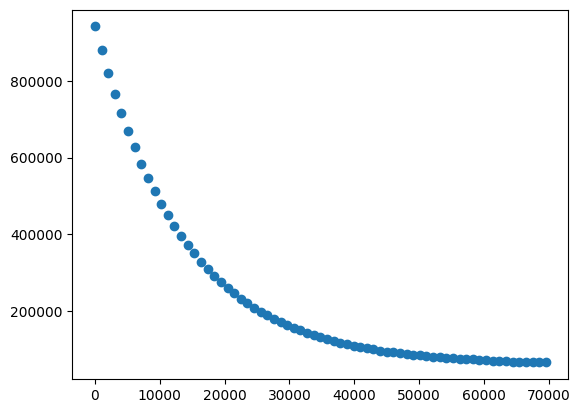

In [128]:
xhelp = np.linspace(data[:,0][0], data[:,0][-1], len(total_counts))*10**(-8)
plt.scatter(xhelp, total_counts)

In [129]:
def funlin(t, a, b, c):
    return np.exp(-t*a)*b +c
yler = np.array(len(total_counts)*[10000])
yler = np.array(total_counts)*0.01
popt, pcov = curve_fit(funlin, xhelp, total_counts, p0=[0.00001, 900000, 60000], sigma=yler, absolute_sigma=True)
perr = np.sqrt(np.diag(pcov))
print('usikkerheder:', perr)
chmin = np.sum(((total_counts - funlin(xhelp, *popt))/yler) ** 2)
print('chi2:', chmin, ' ---> p:', ss.chi2.cdf(chmin, 3))
popt

usikkerheder: [2.33441269e-07 3.19415134e+03 2.39177481e+02]
chi2: 16.629066294550327  ---> p: 0.9991576246111217


array([7.24462193e-05, 8.81223129e+05, 5.96684340e+04])

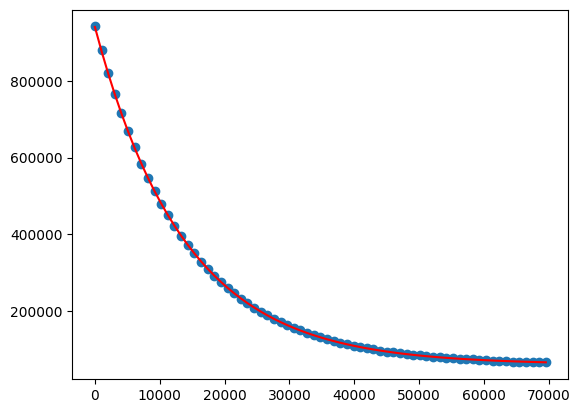

In [117]:
plt.scatter(xhelp, total_counts)
plt.plot(xhelp, funlin(xhelp, *popt), color='red')#, popt[2]))
plt.show()

In [131]:
lifetime = 1/ popt[0]
lifetime/3600

3.834261891518299

In [132]:
halftime = np.log(2)/popt[0]
halftime/3600

2.6577078196343518

In [140]:
channels, counts = np.unique(data[:,1], return_counts=True)

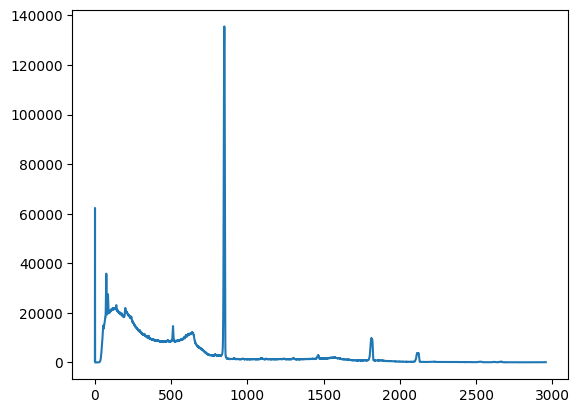

In [150]:
ch = channels*0.73971712 + 0.3785

plt.plot(ch[:4000], counts[:4000])

energies = [848, 2117, 1240, 2662, 1813, 2965, 3122, 2116, 1036, 3377, 2526, 2582]
width = [25, 30, 20, 40, 40, 40, 1, 40, 1, 60, 40, 1]

# time = 1000 #sek
# convert = time * 10**8
total_counts = []
idx = 0
count = 0
for j in range(len(energies)):
    c = []
    idx = 0
    count = 0
    for i in range(len(data)):
        if energies[j] - data[:,1][i] <= width[j]:
            count += 1
        if data[:,0][i] - data[:,0][idx] >= convert:
            c.append(count)
            count = 0
            idx = i
    total_counts.append(c)

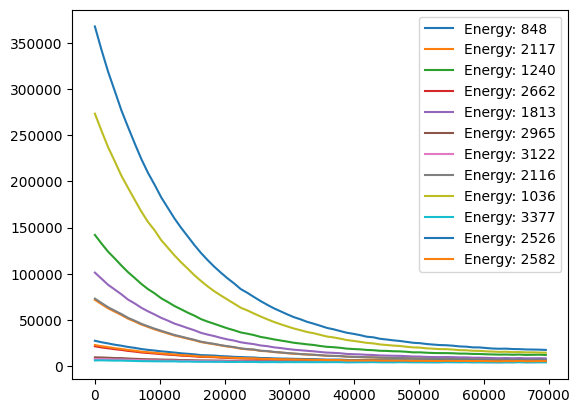

In [158]:
for i in range(len(total_counts)):
    plt.plot(xhelp, total_counts[i], label='Energy: {}'.format(energies[i]))
plt.legend()

####################################################################################################
usikkerheder: [2.00413300e-07 1.20193537e+03 7.14002339e+01]
chi2: 24.79709373143126  ---> p: 0.999982975291698
[7.25056685e-05 3.51622728e+05 1.53354336e+04]


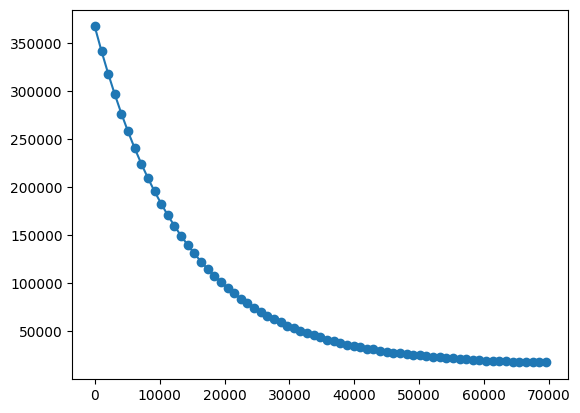

####################################################################################################
usikkerheder: [2.71711204e-07 2.51483668e+02 2.32050043e+01]
chi2: 69.37856484059556  ---> p: 0.9999999999999942
[7.24402754e-05 6.52161820e+04 6.44511236e+03]


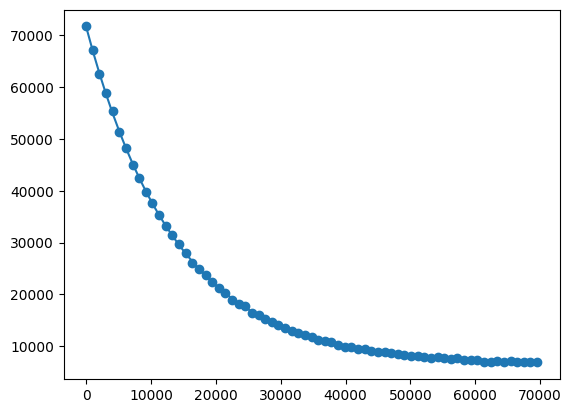

####################################################################################################
usikkerheder: [2.56873372e-07 4.92193960e+02 4.22641283e+01]
chi2: 43.192435841678595  ---> p: 0.9999999977599767
[7.23727732e-05 1.30671658e+05 1.13117792e+04]


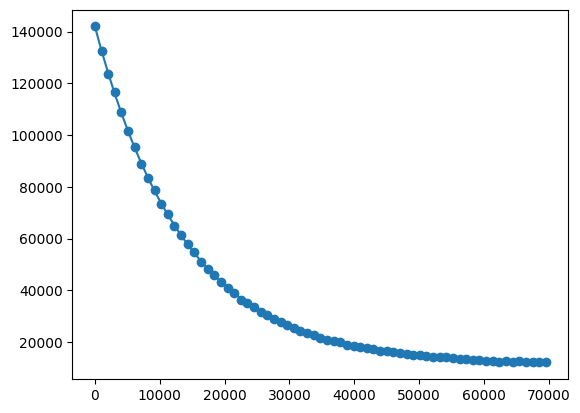

####################################################################################################
usikkerheder: [4.94977073e-07 8.48448721e+01 1.48916749e+01]
chi2: 118.95312160473263  ---> p: 1.0
[7.23299855e-05 1.63108727e+04 5.22998287e+03]


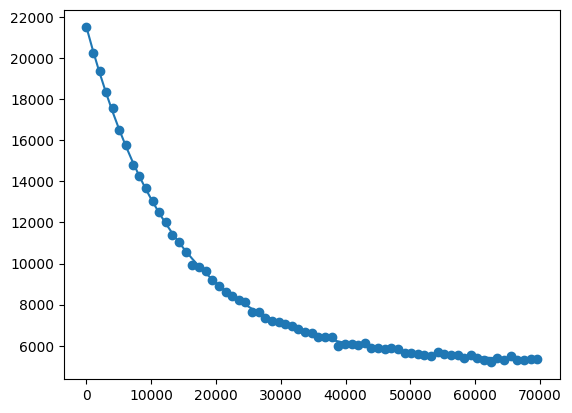

####################################################################################################
usikkerheder: [2.53308572e-07 3.49439449e+02 2.94683051e+01]
chi2: 58.13124717418007  ---> p: 0.9999999999985264
[7.23664781e-05 9.33428266e+04 7.80518652e+03]


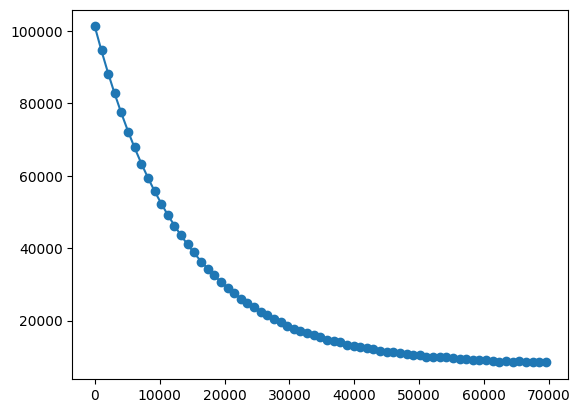

####################################################################################################
usikkerheder: [1.00890071e-06 4.21989764e+01 1.21026652e+01]
chi2: 158.35442747880097  ---> p: 1.0
[7.12425002e-05 5.05122083e+03 4.69129429e+03]


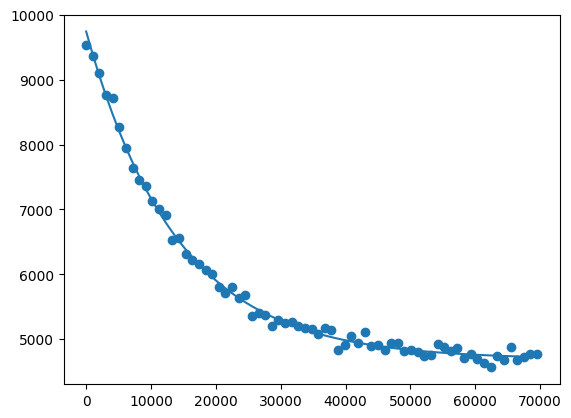

####################################################################################################
usikkerheder: [1.24508549e-06 3.52294286e+01 1.10136935e+01]
chi2: 186.7441943955838  ---> p: 1.0
[7.13143336e-05 3.58427277e+03 4.35860402e+03]


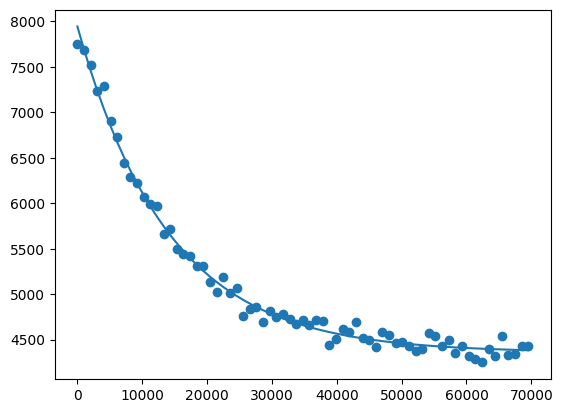

####################################################################################################
usikkerheder: [2.70029006e-07 2.55816207e+02 2.33949811e+01]
chi2: 67.52709068767629  ---> p: 0.9999999999999856
[7.24586698e-05 6.65113702e+04 6.47548972e+03]


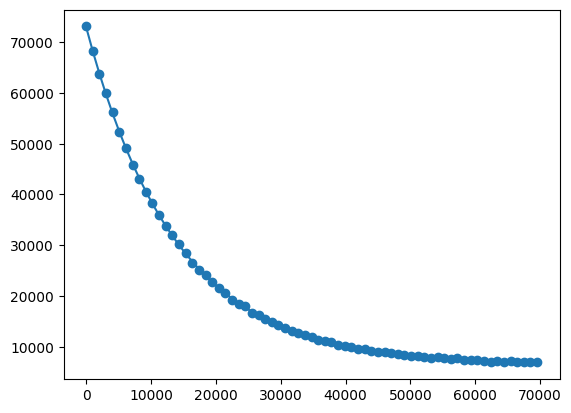

####################################################################################################
usikkerheder: [2.09155660e-07 9.03015807e+02 5.73115652e+01]
chi2: 29.321882866355615  ---> p: 0.9999980835889416
[7.25229916e-05 2.60013320e+05 1.29199450e+04]


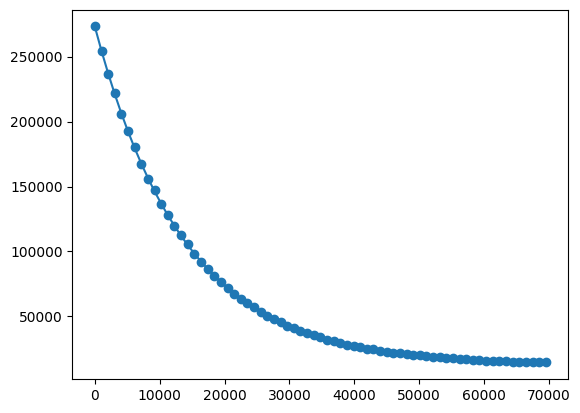

####################################################################################################
usikkerheder: [1.67091910e-06 2.91976637e+01 1.01704433e+01]
chi2: 198.8277364766991  ---> p: 1.0
[7.09623559e-05 2.33472567e+03 4.08645988e+03]


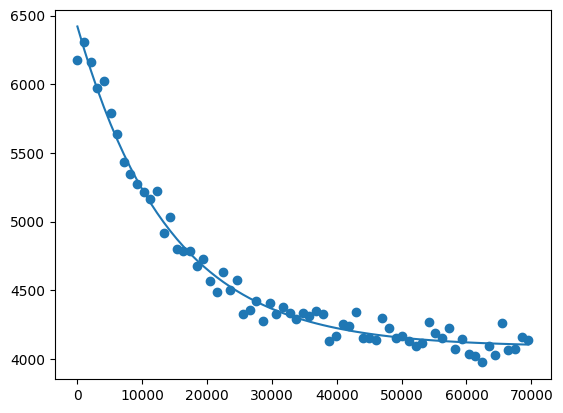

####################################################################################################
usikkerheder: [4.27727711e-07 1.05711558e+02 1.62993338e+01]
chi2: 98.93159741702027  ---> p: 1.0
[7.22848965e-05 2.20421974e+04 5.49755945e+03]


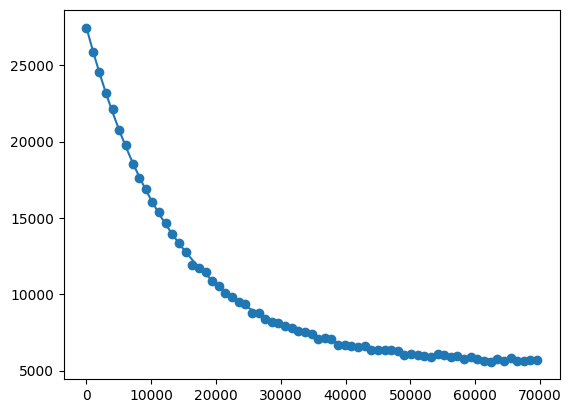

####################################################################################################
usikkerheder: [4.76831609e-07 8.96885413e+01 1.52661661e+01]
chi2: 119.27428158251737  ---> p: 1.0
[7.22886363e-05 1.76122492e+04 5.30894666e+03]


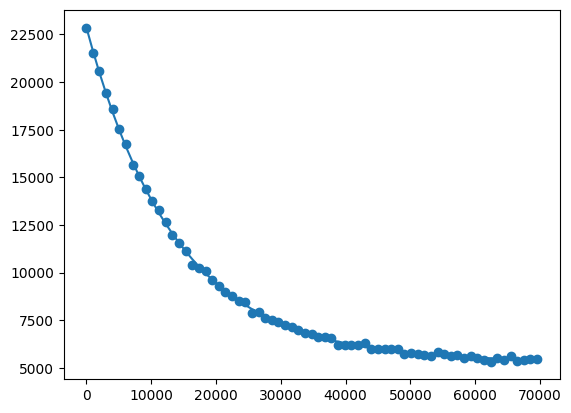

In [169]:
def fit(counts, a, b, k):
    xhelp = np.linspace(data[:,0][0], data[:,0][-1], len(counts))*10**(-8)
    yler = np.array(counts)*0.01
    popt, pcov = curve_fit(funlin, xhelp, counts, p0=[a, b, k], sigma=yler, absolute_sigma=True)
    perr = np.sqrt(np.diag(pcov))
    print('usikkerheder:', perr)
    chmin = np.sum(((counts - funlin(xhelp, *popt))/yler) ** 2)
    print('chi2:', chmin, ' ---> p:', ss.chi2.cdf(chmin, 3))
    print(popt)
    plt.plot(xhelp, funlin(xhelp, *popt))
    plt.scatter(xhelp, counts)
    plt.show()
    return popt[0]

lambd = []

for i in range(len(total_counts)):
    print('#'*100)
    a = fit(total_counts[i], 0.00001*i**0.5, 400000, 40000)
    lambd.append(a)



In [167]:
life = np.array(lambd)
print('Lifetimes: ', (1/life)/3600)
print('Halflives: ', (np.log(2)/life)/3600)

Lifetimes:  [3.83111808 3.8345765  3.83815301 3.84042353 3.83848689 3.8990459
 3.89511847 3.83360305 3.83020297 3.9144385  3.84281906 3.84262025]
Halflives:  [2.6555287  2.65792589 2.66040494 2.66197874 2.66063637 2.70261267
 2.69989038 2.65725115 2.65489439 2.71328201 2.66363919 2.66350139]
